原创教程，版权所有。

同济子豪兄B站视频专栏：https://space.bilibili.com/1900783

玩转UCI心脏病二分类数据集，课件、代码、答疑互动：https://t.zsxq.com/Z7yNZBu

子豪兄Python交流QQ群：1077638784

子豪兄Kaggle数据科学竞赛交流：481041896

微信公众号：人工智能小技巧

2020-05-15


# 本节概述

使用shap机器学习可解释性分析工具包，对uci心脏病数据集上训练得到的随机森林分类模型进行可解释性分析。

shap工具包的进阶技巧：修改预测期望基准值、多模型决策图比较等。

赋予机器学习模型可解释性，打破机器学习模型的黑箱子，让我们能更加充分了解模型、改进模型、信任模型，并对每一个数据样本构建精准定制的数学模型。

# 构建数据集、训练模型、对测试集样本预测

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")

# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")

# 导入数据集，划分特征和标签
df = pd.read_csv('process_heart.csv')
X = df.drop('target',axis=1)
y = df['target']

# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 构建随机森林模型
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

# 计算shap值

In [2]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
expected_value = explainer.expected_value

In [6]:
expected_value

array([0.43020661, 0.56979339])

# 绘制决策图

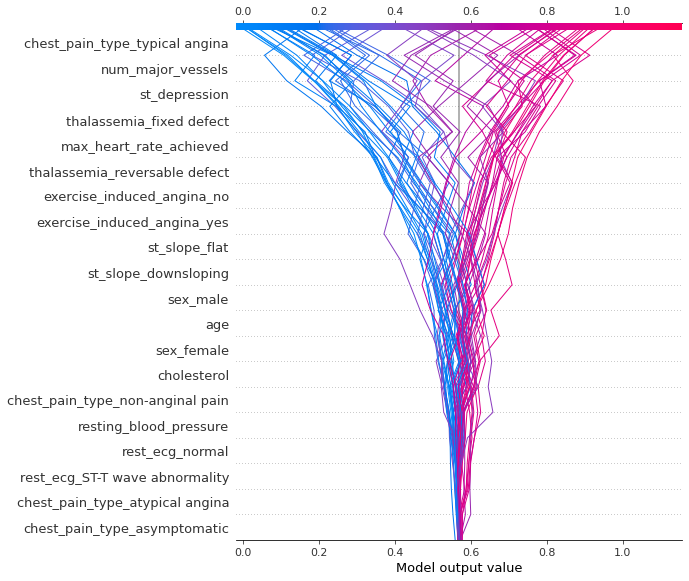

In [3]:
shap.decision_plot(expected_value[1], shap_values[1], X_test)

# 改变决策图中的SHAP基准值

In [4]:
new_base_value = 0.2

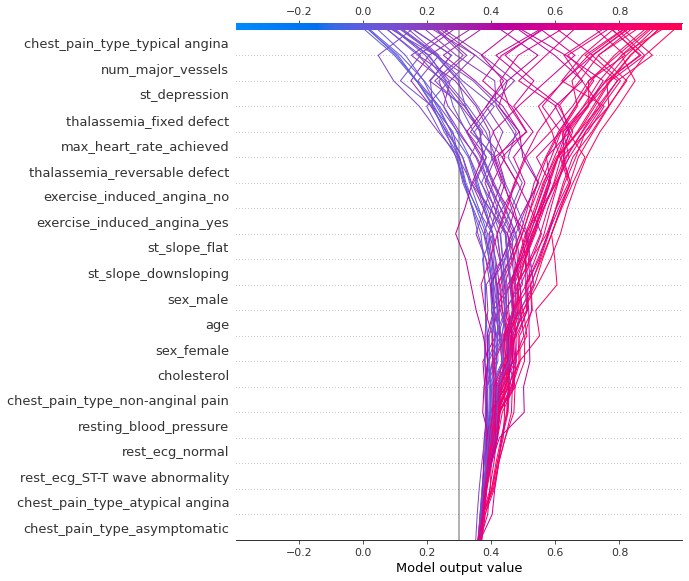

In [5]:
shap.decision_plot(expected_value[1], shap_values[1], X_test, new_base_value=0.3)

# 多模型集成时比较每个模型的决策曲线

参考shap库官方文档教程：https://github.com/slundberg/shap/blob/master/notebooks/plots/decision_plot.ipynb